In [1]:
from PIL import Image
from pylab import *


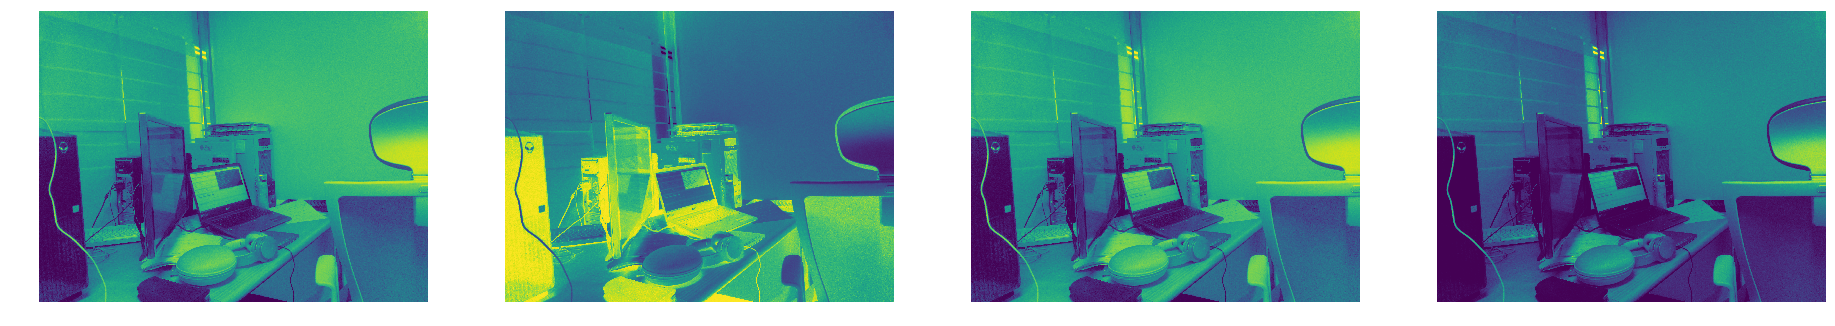

In [2]:
im = array(Image.open('data/img_0.jpg').convert('L'))
im2 = 255 - im #invert image
im3 = (100.0/255) * im + 100 #clamp to interval 100...200
im4 = 255.0 * (im/255.0)**2 #squared
fig, axs = subplots(1, 4, figsize=(32, 32))
axs[0].imshow(im)
axs[0].axis('off')
axs[1].imshow(im2)
axs[1].axis('off')
axs[2].imshow(im3)
axs[2].axis('off')
axs[3].imshow(im4)
axs[3].axis('off')
gray()
show()

In [3]:
def histeq(im,nbr_bins=256):
    """ Histogram equalization of a grayscale image. """
    # get image histogram
    imhist,bins = histogram(im.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize
    # use linear interpolation of cdf to find new pixel values
    im2 = interp(im.flatten(),bins[:-1],cdf)
    return im2.reshape(im.shape), cdf

In [5]:
im2,cdf = histeq(im)

c:\python36\lib\site-packages\ipykernel_launcher.py:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  after removing the cwd from sys.path.


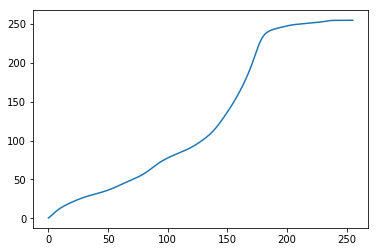

In [6]:
figure()
plot(cdf)
show()

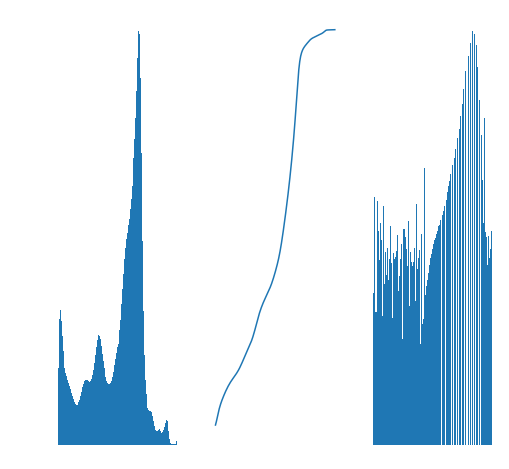

In [7]:
fig, axs = subplots(1, 3, figsize=(8, 8))
axs[0].hist(im.flatten(),128)
axs[0].axis('off')
axs[1].plot(cdf)
axs[1].axis('off')
axs[2].hist(im2.flatten(),128)
axs[2].axis('off')
show()

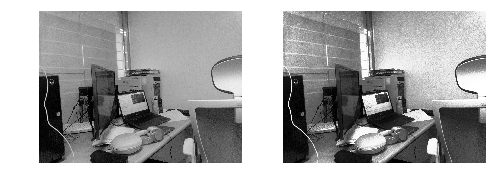

In [8]:
fig, axs = subplots(1, 2, figsize=(8, 8))
axs[0].imshow(im)
axs[0].axis('off')
axs[1].imshow(im2)
axs[1].axis('off')
show()